# Data Analysis - Genres

## Cargando dataset y preparación

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import altair as alt

# Configuración Jupyter
pd.set_option('display.max_columns', None)
sns.set_style("darkgrid")

# Cargamos el dataframe ya limpio desde el análisis de Features
data_ana_corona = pd.read_csv("data_ana_coronaperiod.csv", sep = ',', parse_dates=['release_date_year'])
data_ana_corona = data_ana_corona.drop(columns=['Unnamed: 0'])

print('Tamaño inicial: ',data_ana_corona.shape)
data_ana_corona.sample(2)

Tamaño inicial:  (1581, 37)


,Track Name,Artist,Streams,date,spotify_id,year,Streamstotal,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,release_date_year,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,genres_together,artist_id,artist_followers,artist_popularity,streamstotal_weights
1267,In the Name of Love,Martin Garrix,26529,2017-03-13,04DwTuZ2VBdJCCC5TROn7L,2017,1430124,The Martin Garrix Collection,2017-04-21,0.311843,0.234694,0.0592,0.49,0.485,0.000000,0.337,0.814347,0.025188,0.196,0.477334,4,2017-01-01,big room,edm,pop,progressive house,tropical house,NaN,NaN,NaN,NaN,NaN,"big room,edm,pop,progressive house,tropical house",60d24wfXkVzDSfLS6hyCjZ,13652277,0.848485,0.003379
858,La Calle,Alex Sensation,45013,2020-04-03,4yL2Z0APTcHIE9RJWVfTUt,2020,938461,La Calle,2020-04-02,0.560852,0.714286,0.2970,0.77,0.813,0.000002,0.158,0.906697,0.167632,0.717,0.237708,4,2020-01-01,latin,reggaeton,reggaeton flow,tropical,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,reggaeton flow,tropical",0OROVBEZCocg0FcgJpyBse,110797,0.636364,0.000838


# Pregunta 2: ¿Han cambiado los géneros de música que hemos escuchado en el confinamiento?, ¿es diferente con otros años?

En la extracción hemos metido cada género del artista en una columna para facilitar el análisis, siendo, genre1, genre2, genre3... Por si acaso, hemos dejado una columna con la lista completa de genres como un string.

In [2]:
# Echamos un primer vistazo a las columnas
print(data_ana_corona.shape)
data_ana_corona[data_ana_corona['genre2'] =='latin'].head(3)

(1581, 37)


,Track Name,Artist,Streams,date,spotify_id,year,Streamstotal,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,release_date_year,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,genres_together,artist_id,artist_followers,artist_popularity,streamstotal_weights
298,Coronao Now (Remix),El Alfa,82555,2020-03-13,047WmwIeerHyIUstFAEz5A,2020,3143292,Coronao Now (Remix),2020-02-12,0.451159,0.704082,0.255,0.883,0.853,0.000723,0.412,0.862410,0.209612,0.695,0.371194,4,2020-01-01,dembow,latin,rap dominicano,reggaeton,tropical,NaN,NaN,NaN,NaN,NaN,"dembow,latin,rap dominicano,reggaeton,tropical",2oQX8QiMXOyuqbcZEFsZfm,1148238,0.838384,0.002806
299,4K,El Alfa,56099,2020-03-13,4xI3U4sDj1TPmO9Iz5TkYp,2020,4475589,4K,2020-03-12,0.326357,0.816327,0.357,0.925,0.900,0.005950,0.124,0.875936,0.174870,0.804,0.384744,4,2020-01-01,dembow,latin,rap dominicano,reggaeton,tropical,NaN,NaN,NaN,NaN,NaN,"dembow,latin,rap dominicano,reggaeton,tropical",2oQX8QiMXOyuqbcZEFsZfm,1148238,0.838384,0.003995
300,Coronao Now,El Alfa,46034,2020-03-13,7FbKipScVxkjQxQXwTd0gL,2020,446298,Coronao Now,2019-11-07,0.368363,0.693878,0.146,0.941,0.729,0.004510,0.180,0.770913,0.322525,0.718,0.371348,4,2019-01-01,dembow,latin,rap dominicano,reggaeton,tropical,NaN,NaN,NaN,NaN,NaN,"dembow,latin,rap dominicano,reggaeton,tropical",2oQX8QiMXOyuqbcZEFsZfm,1148238,0.838384,0.000398


Contamos el número de canciones para cada género analizando la columna genre1 y siguientes como primer vistazo

In [3]:
number_genres = data_ana_corona.genre1.value_counts()
# number_genres = data_ana_corona.genre2.value_counts()
# number_genres = data_ana_corona.genre3.value_counts()
number_genres.head(60)

latin                        388
dance pop                    202
colombian pop                 83
pop                           58
spanish pop                   55
cantautor                     54
latin pop                     48
flamenco urbano               46
trap espanol                  41
latin arena pop               33
big room                      31
r&b en espanol                27
spanish hip hop               22
canadian contemporary r&b     22
argentine hip hop             21
canadian hip hop              19
electropop                    19
reggaeton                     17
modern rock                   15
rap espanol                   15
eurovision                    13
dfw rap                       13
boy band                      12
conscious hip hop             12
canadian pop                  11
electro latino                11
garage rock                   11
champeta                      11
trap latino                   10
dembow                         9
latin vira

## Agrupación de géneros

De los artistas hemos extraido los géneros en los que están clasificados en Spotify, que no nos dice solo uno, sino hasta 10 diferentes, lo que nos dificulta el análisis. Algunos artistas tienen hasta 7 géneros asignados que pueden coincidir o no con otros artistas. Esto puede desvirtuar el análisis y dificultar la agrupación de estilos, porque si, por ejemplo, una canción puede tener como género 1 un género muy específico (ej. colombian pop) y está como el primero en la lista del artista, en vez de un género más general (ej. pop).

Tras analizar los valores principales, vemos que el género "latin" es muy ambiguo y no nos ayuda a distinguir, por lo que decido que el siguiente proceso para depurar el género: a los que en el genre1 sea "latin", se les asignará el valor en genre2, que es más específico y los que el genre1 no sea latin se les asignara ese genre1. También si en el genre2 es "latin pop", que se quede con el genre3

In [4]:
# Aplicación de agrupación 1
data_ana_nolatinfirst = data_ana_corona[data_ana_corona['genre1'] != 'latin']
data_ana_latinfirst = data_ana_corona[data_ana_corona['genre1'] == 'latin']

data_ana_corona.loc[data_ana_corona.genre1 == 'latin', 'genre_depurated'] = data_ana_latinfirst['genre2']
data_ana_corona.loc[data_ana_corona.genre2 == 'latin pop', 'genre_depurated'] = data_ana_latinfirst['genre3']
data_ana_corona.loc[data_ana_corona.genre1 != 'latin', 'genre_depurated'] = data_ana_nolatinfirst['genre1']
data_ana_corona.sample(4)

,Track Name,Artist,Streams,date,spotify_id,year,Streamstotal,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,release_date_year,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,genres_together,artist_id,artist_followers,artist_popularity,streamstotal_weights,genre_depurated
1307,YAH.,Kendrick Lamar,13832,2017-04-15,4BHSjbYylfOH5WAGusDyni,2017,13832,DAMN.,2017-04-14,0.220689,0.653061,0.576,0.670,0.700,0.000005,0.2260,0.759980,0.250145,0.648,0.050377,4,2017-01-01,conscious hip hop,hip hop,rap,west coast rap,NaN,NaN,NaN,NaN,NaN,NaN,"conscious hip hop,hip hop,rap,west coast rap",2YZyLoL8N0Wb9xBt1NhZWg,15456567,0.898990,0.000033,conscious hip hop
378,Cuánto Me Duele,Morat,20623,2017-03-13,1PVjdldNeaJxETpW0jpJQo,2017,1195222,Sobre El Amor Y Sus Efectos Secundarios,2016-06-17,0.399850,0.000000,0.390,0.605,0.675,0.000000,0.1030,0.827019,0.024899,0.653,0.531820,4,2016-01-01,colombian pop,latin,latin pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"colombian pop,latin,latin pop",5C4PDR4LnhZTbVnKWXuDKD,3448158,0.828283,0.002824,colombian pop
589,Qué Más Pues,Sech,26728,2019-04-19,5O3cRP4ZHC9vvVIHtET1f0,2019,894118,The Sensation,2018-12-06,0.331911,0.673469,0.065,0.563,0.565,0.000169,0.0855,0.838083,0.510712,0.818,0.717547,4,2018-01-01,latin,panamanian pop,reggaeton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,panamanian pop,reggaeton",77ziqFxp5gaInVrF2lj4ht,5448083,0.929293,0.000959,panamanian pop
1416,Bon appétit,Katy Perry,39695,2017-04-28,61WbtB6ujkpNAsAf5LjF4b,2017,76450,Witness,2017-06-09,0.393852,0.000000,0.111,0.797,0.792,0.000079,0.2400,0.830072,0.054285,0.540,0.291252,4,2017-01-01,dance pop,pop,post-teen pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"dance pop,pop,post-teen pop",6jJ0s89eD6GaHleKKya26X,16232570,0.898990,0.000181,dance pop


Por otro lado, he decidido elegir los siguientes géneros en los que agrupar todos los subgéneros:
- POP
- DANCEPOP
- ROCK
- RAP
- CANTAUTOR
- REGAETTON

Evidentemente este es un agrupamiento subjetivo y dando más importancia a los géneros que aparecen en la columna genre1. También se ha tenido en cuenta en esta agrupación la cantidad de canciones que mencionan un género. Por ejemplo, "reggaeton" podría entrar tambien en "dance", pero se ha decidido separarlo en uno nuevo por el volumen de menciones a este género y se le han añadido similares.

Para hacer esta nueva categorización he tenido en cuenta el texto de los géneros, tras observar que muchos de ellos eran variante de otros generales, por ejemplo, classic rock, atl hiphop, panamanian pop... Los géneros que están mencionamos menos o que son difíciles de categorizar, por ejemplo el brostep, se han dejado en "Others".

Ojo! Esta agrupación esta pensada para este dataset, si se quisiera jugar con otro dataset habría que revisar estos agrupamientos. Igualmente habría que ahcer uan revisión minuciosa si está catalogando correctamente lso géneros.

((Fuente externa Most popular genres:
1	☊	pop
2	☊	dance pop
3	☊	rap
4	☊	pop rap
5	☊	rock
6	☊	post-teen pop
7	☊	latin
8	☊	hip hop
9	☊	trap
10	☊	edm
11	☊	modern rock
12	☊	tropical house
13	☊	pop rock
14	☊	melodic rap
15	☊	reggaeton
16	☊	latin pop
17	☊	classic rock
18	☊	electropop
19	☊	mellow gold
20	☊	album rock
http://everynoise.com/everynoise1d.cgi?vector=popularity&scope=all))

In [17]:
# Aplicación de agrupación 2

#Quitamis un warning deprecated que nos sale
import warnings
warnings.filterwarnings('ignore')

# Grupos de géneros:
list_genres_pop = 'pop, k-pop, boy band, eurovision, carnaval'
list_genres_dance = 'dance, tropical, edm, electropop, big room'
list_genres_rock = 'rock, indie'
list_genres_reggaeton = 'dembow, reggaeton, champeta, cubaton'
list_genres_rap = "rap, hip hop, funk, trap, r&b"
cantautor = 'cantautor, flamenco'

# Reglas de categorización (busqué formas de hacerlo más nuevas, pero no cosneguí que funcionara)
data_ana_corona['genre_depurated_final'] = pd.np.where(data_ana_corona.genre_depurated.str.contains("dance"), 'dance',
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("tropical"), 'dance',            
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("edm"), 'dance',
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("electropop"), 'dance',
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("big room"), 'dance',
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("new french"), 'dance',
                                          
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("pop"), 'pop',
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("k-pop"), 'pop',
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("carnaval"), 'pop',                      
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("eurovision"), 'pop',
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("boy band"), 'pop',
                        
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("rock"), 'rock',            
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("indie"), 'rock',
                                          
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("bachata"), 'reggaeton',                               
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("dembow"), 'reggaeton',            
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("reggaeton"), 'reggaeton',            
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("champeta"), 'reggaeton',
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("cubaton"), 'reggaeton',
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("rumba"), 'reggaeton',                        
                                          
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("hip hop"), 'hip hop',            
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("rap"), 'hip hop',            
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("funk"), 'hip hop',            
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("trap"), 'hip hop',            
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("r&b"), 'hip hop',
                                          
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("cantautor"), 'cantautor',            
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("flamenco"), 'cantautor',            
                                    
                                          "other"))))))))))))))))))))))))))

# Exportamos dataframe con genre para usar en otro análisis más tarde
data_ana_corona.to_csv("data_ana_coronaperiod_withgenre2.csv", sep = ',')

# Vemos unas pruebas
# data_ana_corona[data_ana_corona['genre_depurated'] == 'dembow']
data_ana_corona[data_ana_corona['genre_depurated'] == 'new french touch']

,Track Name,Artist,Streams,date,spotify_id,year,Streamstotal,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,release_date_year,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,genres_together,artist_id,artist_followers,artist_popularity,streamstotal_weights,genre_depurated,genre_depurated_final
1203,Sunset Lover,Petit Biscuit,30275,2019-03-24,3WRQUvzRvBDr4AxMWhXc5E,2019,93856,Presence,2017-11-10,0.422277,0.744898,0.6690,0.785,0.525,0.439000,0.1140,0.771044,0.027215,0.251,0.189796,4,2017-01-01,new french touch,tropical house,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"new french touch,tropical house",6gK1Uct5FEdaUWRWpU4Cl2,785467,0.747475,0.000101,new french touch,dance
1374,Katchi - Ofenbach vs. Nick Waterhouse,Ofenbach,29729,2018-03-13,2NF8A7C6tICScdRaZ0BrEe,2018,1382876,Katchi (Ofenbach vs. Nick Waterhouse),2017-08-25,0.196887,0.673469,0.0261,0.837,0.793,0.000090,0.0743,0.853381,0.048494,0.870,0.417863,4,2017-01-01,new french touch,tropical house,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"new french touch,tropical house",4AKwRarlmsUlLjIwt38NLw,349875,0.747475,0.001965,new french touch,dance
1375,Be Mine,Ofenbach,16107,2017-04-17,2KklXplRtxMsBYo474Es0w,2017,338435,Be Mine,2016-11-25,0.223328,0.714286,0.1940,0.779,0.666,0.000556,0.0576,0.777446,0.036190,0.507,0.404741,4,2016-01-01,new french touch,tropical house,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"new french touch,tropical house",4AKwRarlmsUlLjIwt38NLw,349875,0.747475,0.000800,new french touch,dance


In [15]:
data_ana_corona

,Track Name,Artist,Streams,date,spotify_id,year,Streamstotal,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,release_date_year,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,genres_together,artist_id,artist_followers,artist_popularity,streamstotal_weights,genre_depurated,genre_depurated_final
0,Tusa,KAROL G,432730,2020-03-13,7k4t7uLgtOxPwTpFmtJNTY,2020,19082982,Tusa,2019-11-07,0.324972,0.908163,0.29500,0.803,0.715,0.000134,0.0574,0.911425,0.397800,0.574,0.258160,4,2019-01-01,latin,latin pop,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,"latin,latin pop,reggaeton,reggaeton colombiano",790FomKkXshlbRYZFtlgla,11841901,0.898990,0.017033,reggaeton,reggaeton
1,Follow,KAROL G,152745,2020-04-02,2w1rq80FIrbxeJy9WYURxw,2020,6900319,Follow,2020-04-01,0.330442,0.765306,0.66700,0.735,0.787,0.000006,0.0721,0.875476,0.198031,0.455,0.711901,4,2020-01-01,latin,latin pop,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,"latin,latin pop,reggaeton,reggaeton colombiano",790FomKkXshlbRYZFtlgla,11841901,0.898990,0.006159,reggaeton,reggaeton
2,Créeme,KAROL G,75552,2019-03-13,1mT47pKLXUwPYGwB91GcNz,2019,3272814,Créeme,2018-11-02,0.354546,0.734694,0.15400,0.715,0.872,0.000146,0.1100,0.904169,0.045599,0.682,0.230459,4,2018-01-01,latin,latin pop,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,"latin,latin pop,reggaeton,reggaeton colombiano",790FomKkXshlbRYZFtlgla,11841901,0.898990,0.003510,reggaeton,reggaeton
3,Culpables,KAROL G,56202,2019-03-13,6q8Lb50EtqNeeJXXe8mMAH,2019,2136436,Culpables,2018-09-14,0.390787,0.693878,0.27900,0.728,0.801,0.000005,0.1430,0.922521,0.065287,0.416,0.451744,4,2018-01-01,latin,latin pop,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,"latin,latin pop,reggaeton,reggaeton colombiano",790FomKkXshlbRYZFtlgla,11841901,0.898990,0.002291,reggaeton,reggaeton
4,Punto G,KAROL G,51826,2019-04-05,5Lb1pjnll07UQKxNpnnGBy,2019,1930173,Punto G,2019-04-05,0.275291,0.622449,0.00796,0.787,0.751,0.000139,0.0857,0.863559,0.091633,0.926,0.691617,4,2019-01-01,latin,latin pop,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,"latin,latin pop,reggaeton,reggaeton colombiano",790FomKkXshlbRYZFtlgla,11841901,0.898990,0.002070,reggaeton,reggaeton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,No Vacancy,OneRepublic,18520,2017-04-28,6XOYVSmNDjKUNMXooU4s4z,2017,34975,No Vacancy,2017-04-28,0.381974,0.010204,0.05710,0.710,0.730,0.000000,0.1390,0.887754,0.054285,0.480,0.250817,4,2017-01-01,dance pop,neo mellow,piano rock,pop,pop rock,NaN,NaN,NaN,NaN,NaN,"dance pop,neo mellow,piano rock,pop,pop rock",5Pwc4xIPtQLFEnJriah9YJ,10630859,0.858586,0.000083,dance pop,dance
1577,Unforgettable,French Montana,14014,2017-04-30,1F2HXIJrE2Xn81OzT2zZvW,2017,264615,Unforgettable,2017,0.409266,0.020408,0.02930,0.726,0.769,0.010100,0.1040,0.853546,0.144470,0.733,0.237447,4,2017-01-01,hip hop,pop rap,rap,southern hip hop,trap,NaN,NaN,NaN,NaN,NaN,"hip hop,pop rap,rap,southern hip hop,trap",6vXTefBL93Dj5IqAWq6OTv,3622314,0.828283,0.000625,hip hop,hip hop
1578,Pretty Girl - Cheat Codes X CADE Remix,Maggie Lindemann,15928,2017-05-03,39IsH7B5byx8NRlEKlZVg9,2017,190781,Pretty Girl (Cheat Codes X CADE Remix),2017-03-03,0.306132,0.724490,0.15000,0.703,0.868,0.132000,0.1040,0.866087,0.008541,0.733,0.391419,4,2017-01-01,dance pop,pop,post-teen pop,social media pop,viral pop,NaN,NaN,NaN,NaN,NaN,"dance pop,pop,post-teen pop,social media pop,v...",0uGk2czvcpWQA383Im6ajf,1203773,0.727273,0.000451,dance pop,dance
1579,Slow Hands,Niall Horan,19627,2017-05-05,167NczpNbRF7oWakJaY3Hh,2017,120238,Slow Hands,2017-05-04,0.292185,0.020408,0.01420,0.728,0.426,0.000000,0.0546,0.799475,0.040098,0.844,0.156757,4,2017-01-01,dance pop,pop,post-teen pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"dance pop,pop,post-teen pop",1Hsdzj7Dlq2I7tHP7501T4,589971

Vemos cómo quedan ahora distribuidos los géneros y se ve algo más claro. **Pero ojo, esto es un simple conteo de cuantas veces aparece un género y no se tiene en cuenta el número de veces que se ha escuchado cada canción, para ello tendremos que ponderar con el número de streams total de cada canción y trasladarlo a los géneros.**

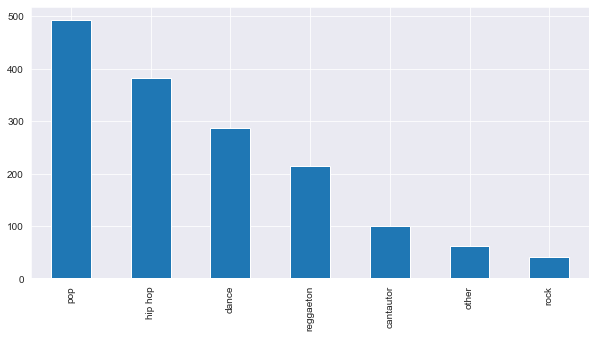

In [6]:
number_genres_new = data_ana_corona.genre_depurated_final.value_counts()
plt.figure(figsize=(10,5)) 
number_genres_new.plot.bar()
plt.show()


## Ponderación por streams totales y años

Vamos a ver los pesos que tienen por años, respecto a los streams totales

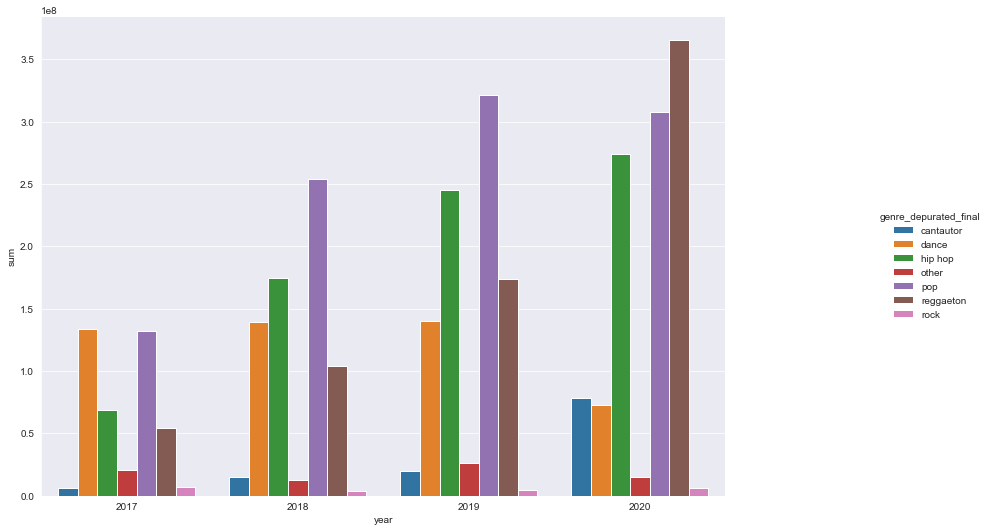

In [7]:
# Hacemnos groupby
data_group_streamstotal = data_ana_corona.groupby(['genre_depurated_final','year']).agg(['sum', 'count'])

# Vamos a resetear el index para poder analizar mejor
data_group_streamstotal2 = data_group_streamstotal['Streamstotal']
data_group_streamstotal2.reset_index(inplace=True)

#Y hacemos cálculo de los streams totales de cada género depurado
graph_genre = sns.catplot(x='year', y='sum', hue='genre_depurated_final', data=data_group_streamstotal2, kind='bar')
graph_genre.fig.set_size_inches(15,8)

Pero lo anterior tiene también el problema de que en el 2020 hay más streams totales, entonces habría que hacer proporcional a su total de streams por año y así sacamos los porcentajes de cada género en cada año de la música escuchada.

In [8]:
# Creo una función para extraerlo más fácil donde se mete el año y el género:
def extract_percentage(year, genre):
    datos_ano = data_group_streamstotal2[data_group_streamstotal2['year'] == year]
    percentage = 100 * datos_ano[datos_ano['genre_depurated_final'] == genre].sum()[2]/ data_group_streamstotal2[data_group_streamstotal2['year'] == year].sum()[2]
    return [year, genre, percentage]

# Y otra función para crear el dataframe resultante por año
def create_df_year(year):
    list_genres = ['pop', 'dance', 'rock','reggaeton','hip hop','cantautor', 'other']
    data_1 = extract_percentage(year, list_genres[0])
    data_2 = extract_percentage(year, list_genres[1])
    data_3 = extract_percentage(year, list_genres[2])
    data_4 = extract_percentage(year, list_genres[3])
    data_5 = extract_percentage(year, list_genres[4])
    data_6 = extract_percentage(year, list_genres[5])
    data_7 = extract_percentage(year, list_genres[6]) 
    df_new = pd.DataFrame([data_1, data_2,data_3,data_4,data_5,data_6,data_7,], columns = ['year', 'genre', 'percentage'])
    return df_new

# Guardo dataframes
data_genre_2017 = create_df_year(2017)
data_genre_2018 = create_df_year(2018)
data_genre_2019 = create_df_year(2019)
data_genre_2020 = create_df_year(2020)

# Junto dataframes
data_genre_years = pd.concat([data_genre_2017, data_genre_2018, data_genre_2019, data_genre_2020])

# Comprobamos que está bien hecho
print(data_genre_years.groupby('year').sum())

# Hago función para que me saque el gráfico de cada género
'''genre_list = ['pop', 'dance','rock','reggaeton','hip hop', 'cantautor', 'other']
def graph_genre(genre):
    data_genre = data_genre_years[data_genre_years['genre'] == genre]
    sns.catplot(x="year", y="percentage", data=data_genre, height=6, kind="bar", palette="muted")
    plt.title(genre)
    return

for genre in genre_list:
    graph_genre(genre)'''

data_genre_years.head(5)

      percentage
year            
2017       100.0
2018       100.0
2019       100.0
2020       100.0


,year,genre,percentage
0,2017,pop,31.171908
1,2017,dance,31.646855
2,2017,rock,1.613388
3,2017,reggaeton,12.859422
4,2017,hip hop,16.312866


Hacemos el mismo script pero para sacar los datos del PERIODO NORMAL, no hace falta ejecutar

In [9]:
# Script completo para sacar lo mismo pero de Normal Period y guardarlo en CSV
'''# Aplicación de agrupación 1
data_ana_nolatinfirst = data_ana_corona[data_ana_corona['genre1'] != 'latin']
data_ana_latinfirst = data_ana_corona[data_ana_corona['genre1'] == 'latin']

data_ana_corona.loc[data_ana_corona.genre1 == 'latin', 'genre_depurated'] = data_ana_latinfirst['genre2']
data_ana_corona.loc[data_ana_corona.genre2 == 'latin pop', 'genre_depurated'] = data_ana_latinfirst['genre3']
data_ana_corona.loc[data_ana_corona.genre1 != 'latin', 'genre_depurated'] = data_ana_nolatinfirst['genre1']
data_ana_corona.head(2)

# Aplicación de agrupación 2

#Quitamis un warning deprecated que nos sale
import warnings
warnings.filterwarnings('ignore')

# Grupos de géneros:
list_genres_pop = 'pop, k-pop, boy band, eurovision, carnaval'
list_genres_dance = 'dance, tropical, edm, electropop, big room'
list_genres_rock = 'rock, indie'
list_genres_reggaeton = 'dembow, reggaeton, champeta, cubaton'
list_genres_rap = "rap, hip hop, funk, trap, r&b"
cantautor = 'cantautor, flamenco'

# Reglas de categorización (busqué formas de hacerlo más nuevas, pero no cosneguí que funcionara)
data_ana_corona['genre_depurated_final'] = pd.np.where(data_ana_corona.genre_depurated.str.contains("dance"), 'dance',
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("tropical"), 'dance',            
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("edm"), 'dance',
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("electropop"), 'dance',
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("big room"), 'dance',
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("new french"), 'dance',
                                          
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("pop"), 'pop',
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("k-pop"), 'pop',
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("carnaval"), 'pop',                      
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("eurovision"), 'pop',
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("boy band"), 'pop',
                        
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("rock"), 'rock',            
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("indie"), 'rock',
                                          
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("bachata"), 'reggaeton',                               
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("dembow"), 'reggaeton',            
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("reggaeton"), 'reggaeton',            
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("champeta"), 'reggaeton',
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("cubaton"), 'reggaeton',
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("rumba"), 'reggaeton',                        
                                          
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("hip hop"), 'hip hop',            
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("rap"), 'hip hop',            
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("funk"), 'hip hop',            
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("trap"), 'hip hop',            
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("r&b"), 'hip hop',
                                          
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("cantautor"), 'cantautor',            
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("flamenco"), 'cantautor',            
                                    
                                          "other"))))))))))))))))))))))))))

# Vamos a ver los pesos que tienen por años, respecto a los streams
data_group_streamstotal = data_ana_corona.groupby(['genre_depurated_final','year']).agg(['sum', 'count'])

# Vamos a resetear el index para poder analizar mejor
data_group_streamstotal2 = data_group_streamstotal['Streamstotal']
data_group_streamstotal2.reset_index(inplace=True)

#Y hacemos cálculo de los streams totales de cada género depurado
graph_genre = sns.catplot(x='year', y='sum', hue='genre_depurated_final', data=data_group_streamstotal2, kind='bar')
graph_genre.fig.set_size_inches(15,8)

# Creo una función para extraerlo más fácil donde se mete el año y el género:
def extract_percentage(year, genre):
    datos_ano = data_group_streamstotal2[data_group_streamstotal2['year'] == year]
    percentage = 100 * datos_ano[datos_ano['genre_depurated_final'] == genre].sum()[2]/ data_group_streamstotal2[data_group_streamstotal2['year'] == year].sum()[2]
    return [year, genre, percentage]

# Y otra función para crear el dataframe resultante por año
def create_df_year(year):
    list_genres = ['pop', 'dance', 'rock','reggaeton','hip hop','cantautor', 'other']
    data_1 = extract_percentage(year, list_genres[0])
    data_2 = extract_percentage(year, list_genres[1])
    data_3 = extract_percentage(year, list_genres[2])
    data_4 = extract_percentage(year, list_genres[3])
    data_5 = extract_percentage(year, list_genres[4])
    data_6 = extract_percentage(year, list_genres[5])
    data_7 = extract_percentage(year, list_genres[6]) 
    df_new = pd.DataFrame([data_1, data_2,data_3,data_4,data_5,data_6,data_7,], columns = ['year', 'genre', 'percentage'])
    return df_new

# Guardo dataframes
data_genre_2017 = create_df_year(2017)
data_genre_2018 = create_df_year(2018)
data_genre_2019 = create_df_year(2019)
data_genre_2020 = create_df_year(2020)

# Junto dataframes
data_genre_years = pd.concat([data_genre_2017, data_genre_2018, data_genre_2019, data_genre_2020])

# Exportamos para ver en Tableau
data_genre_years.to_csv("tableau_graph_and_analysis/data_totableau3_normalperiod.csv", sep = ',')'''

'# Aplicación de agrupación 1\ndata_ana_nolatinfirst = data_ana_corona[data_ana_corona[\'genre1\'] != \'latin\']\ndata_ana_latinfirst = data_ana_corona[data_ana_corona[\'genre1\'] == \'latin\']\n\ndata_ana_corona.loc[data_ana_corona.genre1 == \'latin\', \'genre_depurated\'] = data_ana_latinfirst[\'genre2\']\ndata_ana_corona.loc[data_ana_corona.genre2 == \'latin pop\', \'genre_depurated\'] = data_ana_latinfirst[\'genre3\']\ndata_ana_corona.loc[data_ana_corona.genre1 != \'latin\', \'genre_depurated\'] = data_ana_nolatinfirst[\'genre1\']\ndata_ana_corona.head(2)\n\n# Aplicación de agrupación 2\n\n#Quitamis un warning deprecated que nos sale\nimport warnings\nwarnings.filterwarnings(\'ignore\')\n\n# Grupos de géneros:\nlist_genres_pop = \'pop, k-pop, boy band, eurovision, carnaval\'\nlist_genres_dance = \'dance, tropical, edm, electropop, big room\'\nlist_genres_rock = \'rock, indie\'\nlist_genres_reggaeton = \'dembow, reggaeton, champeta, cubaton\'\nlist_genres_rap = "rap, hip hop, funk, 

## ¿Pueden afectar los lanzamientos de discos en fechas cercanas?

Antes del análisis quiero resaltar un tema importante: el cambio relevante de un tipo de género en el periodo pandemia puede estar vinculado a otros factores, especialmente los lanzamientos de discos. Si hacemos una observación en el script de más abajo que saco los albunes/discos de música con mayores Streams totales y vemos su lanzamiento:
- En el 2020 hubo dos lanzamientos en el primer trimestre del año que tuvieron mucho éxito y están vinculados a reggaeton: Bad Bunny y J Balvin
- En el 2019, varios lanzamientos categorizados como hiphop y que tuvieron su lanzamiento a primeros de año
- En el 2018 el mayor éxito en el periodo estaba vinculado a un grupo de hiphop y de pop, pero sólo uno de ellos tiene lanzamiento en fechas próximas.
- En el 2017, hay éxitos de dance y de pop lanzados en fehas próximas, pero otros no.

Pasamos a la análisis teniendo en cuenta este aspecto

In [10]:
# Mostramos los albunes más escuchados en el periodo
grouped = data_ana_corona.groupby(['year','genre_depurated_final','album','Artist','release_date']).sum().reset_index()
grouped = grouped.sort_values('Streamstotal', ascending=False)

# Vemos del año 2020
grouped[grouped['year'] == 2020].head(4)

,year,genre_depurated_final,album,Artist,release_date,Streams,Streamstotal,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,artist_followers,artist_popularity,streamstotal_weights
1199,2020,reggaeton,YHLQMDLG,Bad Bunny,2020-02-28,2940943,111152562,6.342581,15.683673,3.4881,15.407,14.528,0.000449,2.7950,17.042974,2.609583,12.369,6.790835,80,492365900,19.595960,0.099210
1157,2020,reggaeton,Colores,J Balvin,2020-03-19,3869381,81693020,2.553552,7.867347,1.0669,7.758,7.369,0.693537,1.6856,8.757420,1.622611,6.780,3.892638,41,223712510,9.797980,0.072916
971,2020,hip hop,Con Calma,Daddy Yankee,2019-01-24,43454,23813270,0.305140,0.836735,0.1100,0.737,0.860,0.000002,0.0574,0.932042,0.052258,0.656,0.210749,4,19850865,0.929293,0.021255
970,2020,hip hop,Con Altura,ROSALÍA,2019-03-28,52717,23640038,0.224108,0.816327,0.3900,0.882,0.689,0.003250,0.0501,0.886901,0.145918,0.746,0.237300,4,3968309,0.848485,0.021100


In [11]:
# Vemos del año 2019
grouped[grouped['year'] == 2019].head(4)

,year,genre_depurated_final,album,Artist,release_date,Streams,Streamstotal,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,artist_followers,artist_popularity,streamstotal_weights
689,2019,hip hop,La Dura Vida del Joven Rapero,Don Patricio,2019-01-27,612176,34954623,1.450400,0.540816,0.9389,3.023,2.407,0.005618,0.4467,3.140939,0.812102,2.602,1.510232,16,1646764,2.909091,0.037485
846,2019,pop,÷ (Deluxe),Ed Sheeran,2017-03-03,65963,26316688,0.894045,1.744898,0.7440,1.424,1.100,0.000000,0.1991,1.726494,0.082513,1.099,0.441869,7,139072650,1.878788,0.028221
885,2019,reggaeton,X 100PRE,Bad Bunny,2018-12-23,446070,18721279,2.201678,4.479592,1.5792,4.397,3.573,0.003377,0.7547,4.821110,0.992472,2.035,3.681441,24,147709770,5.878788,0.020076
803,2019,pop,Me Niego (feat. Ozuna & Wisin),Reik,2018-02-16,47910,16877537,0.378035,0.071429,0.0543,0.777,0.779,0.000000,0.6360,0.873047,0.107122,0.768,0.210976,4,4623346,0.858586,0.018099


In [12]:
# Vemos del año 2018
grouped[grouped['year'] == 2018].head(4)

,year,genre_depurated_final,album,Artist,release_date,Streams,Streamstotal,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,artist_followers,artist_popularity,streamstotal_weights
489,2018,pop,Despacito (Featuring Daddy Yankee),Luis Fonsi,2017-01-13,25924,21016174,0.394824,0.051020,0.2090,0.660,0.786,0.000000,0.1120,0.862935,0.212507,0.846,0.770938,4,8767087,0.808081,0.029862
524,2018,pop,Odisea,Ozuna,2017-08-25,377462,20419563,1.722606,3.642857,0.8540,3.685,3.506,0.001739,0.8663,4.234242,0.733353,2.936,2.341235,20,121250390,4.797980,0.029014
443,2018,hip hop,X,Nicky Jam,2018-03-02,254536,18154321,0.254882,0.112245,0.0364,0.595,0.773,0.001080,0.3340,0.863624,0.045889,0.711,0.785904,4,12700362,0.898990,0.025795
350,2018,dance,SUBEME LA RADIO (feat. Descemer Bueno & Zion &...,Enrique Iglesias,2017-02-24,22996,16904129,0.343440,0.755102,0.0744,0.684,0.823,0.000000,0.1110,0.910867,0.078315,0.647,0.191099,4,9583391,0.818182,0.024019


In [13]:
grouped[grouped['year'] == 2017].head(4)

,year,genre_depurated_final,album,Artist,release_date,Streams,Streamstotal,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,artist_followers,artist_popularity,streamstotal_weights
248,2017,pop,÷ (Deluxe),Ed Sheeran,2017-03-03,733594,17839085,5.224979,10.193878,5.3726,9.153,8.156,0.000011,2.0470,11.625607,0.949768,8.268,4.164828,54,973508550,13.151515,0.042143
255,2017,reggaeton,Energía,J Balvin,2016-06-24,456158,13783445,1.672007,1.428571,1.5070,3.711,3.962,0.000244,0.7830,4.439002,1.598147,3.819,2.751535,20,111856255,4.898990,0.032562
191,2017,pop,El Dorado,Shakira,2017-05-26,234277,10880886,0.703315,1.489796,0.3800,1.592,1.652,0.000113,0.2518,1.868418,0.197163,1.855,0.540198,8,39178152,1.717172,0.025705
36,2017,dance,Hey Ma (with Pitbull & J Balvin feat. Camila C...,Pitbull,2017-03-09,52404,9151628,0.309537,0.561224,0.0277,0.489,0.962,0.000006,0.1280,0.933848,0.277649,0.518,0.281397,4,7912875,0.858586,0.021620


## Visualización en Tableau

A partir de aquí decidí hacer los gráficos y análisis directamente con Tableau. Los archivos de Tableau está en la siguiente carpeta en la raíz:
- /tableau_graph_and_analysis/Tableau_Analysis2_coronaperiod2.twb
- /tableau_graph_and_analysis/Tableau_Analysis2_normalperiod2.twb

Aún así,he insertado aquí dos imágenes de los dashboards abajo


In [14]:
# Ojo! cambiar para exportar diferentes datasets! 
# Exportamos para ver en Tableau PERIODO PANDEMIA
data_genre_years.to_csv("tableau_graph_and_analysis/data_totableau3_coronaperiod.csv", sep = ',')
# Exportamos para ver en Tableau PERIODO NORMAL
# data_genre_years.to_csv("tableau_graph_and_analysis/data_totableau3_normalperiod.csv", sep = ',')

<img src="tableau_graph_and_analysis/dashboard_pandemia.png" style="width: 1200px;">

De primeras, más que diferencias entre periodos, lo que se puede ver son las tendencias que han seguido en los últimos 4 años. Podemos señalar que:
- **Pop:** Parece que desde años atrás está perdiendo fuerza y el confinamiento ha decidido no ayudarle..., o es que no ha habido muchos lanzamientos de discos de pop importantes durante esos periodos en los años?
- **Hiphop:** hay una tendencia de aumento de escucha pero en el 2020 cambia y se reduce, ¿mola menos el hiphop en confinamiento? Porque si comparamos con el periodo normal, había un aumento que se mantiene en el 2020, 
- **Reggaeton:** Hay una tendencia de aumento, pero se ve que en el 2020 en el periodo de pandemia es más drástico, ¿lo petó el reggaeton en el confinamiento? O es que el peso de los lanzamientos de discos de Bad Bunny y J Balvin (clasificados como Reggaeton) en dichas fechas es muy contundente? 
- **Cantautor:** Está de capa caída, como el pop y tampoco cambió en el 2010.
- **Cantautor:** Se ve un claro aumento en el 2020, tanto en periodo pandemia como el normal.
- **Rock y otros:** Sin comentarios que añadir.

<img src="tableau_graph_and_analysis/dashboard_normal.png" style="width: 1200px;">

## Conclusión:

No se puede decir que la pandemia haya provocado un cambio relevante en el tipo de género de música que se escuchaba porque puede estar muy influenciado por el lanzamiento de discos. **Sí que se pueden sacar conslución de tendencia, parece que el reggaeton está en auge, y el dance y pop en decadencia.**

Sería muy interesante hacer este análisis pero de todo el año para que los lanzamientos de discos en determinados periodos no afecten tanto al análisis. Y con esto también habría que hacer una revisión del etiquetado de géneros mucho más precisa. Tal vez lo siguiente.

## Después de este análisis pasamos al siguiente Notebook en orden de lectura:
- [Data_Analysis3_Oldies.ipynb](Data_Analysis3_Oldies.ipynb)

**De este Notebook extraemos los siguientes CSVs que hemos usado con Tableau:**
- tableau_graph_and_analysis/data_totableau3_coronaperiod.csv
- tableau_graph_and_analysis/data_totableau3_normalperiod.csv
